In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"

 Activating environment at `~/Documents/otimizacao-em-julia/notebooks/Project.toml`


In [2]:
using ForwardDiff, Plots, Interact
gr(size=(600,400))

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8959772993190332126\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7106728491550887127\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8959772993190332126\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

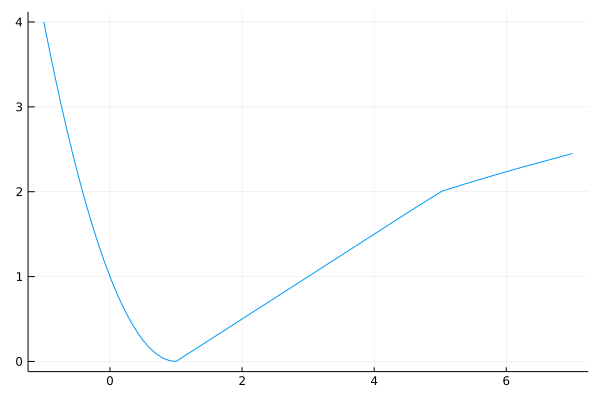

In [6]:
f(x) = if x ≤ 1
    (x - 1)^2
elseif x ≤ 5
    (x - 1) * 0.5
else
    sqrt(x - 1)
end
a, b = -1, 7
plot(f, a, b, leg=false)

In [25]:
function random_uni(f, a, b)    
    c = a + (b - a) * rand()
    k = 0
    while b - a ≥ 1e-4
        d = a + (b - a) * rand()
        if c > d
            c, d = d, c
        end
        if f(c) < f(d)
            a, b, c = a, d, c
        else
            a, b, c = c, b, d
        end
        k = k + 1
    end
    
    return c, k
end

random_uni (generic function with 1 method)

In [17]:
function random_uni_plot(p, f, a, b)    
    c = a + (b - a) * rand()
    
    scatter!(p, [a, b], [f(a), f(b)], c=:red, ms=3)
    scatter!(p, [c], [f(c)], c=:blue, ms=3)
    annotate!(p, [c], [f(c) + 0.2], "0")
    for k = 1:10
        d = a + (b - a) * rand()
        if c > d
            c, d = d, c
        end
        if f(c) < f(d)
            a, b, c = a, d, c
        else
            a, b, c = c, b, d
        end
        scatter!(p, [c], [f(c)], c=:blue, ms=3)
        annotate!(p, [c], [f(c) + 0.2], "$k")
    end
    
    return c
end

random_uni_plot (generic function with 1 method)

In [39]:
c, k = random_uni(f, a, b)
c, k, f(c)

(0.9999987250966684, 38, 1.6253785048527831e-12)

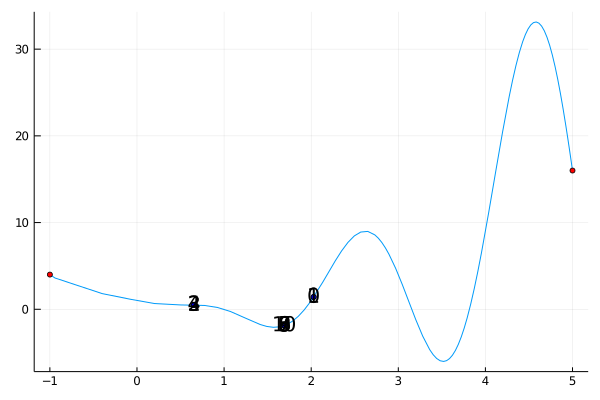

In [66]:
g(x) = (x - 1)^2 + x^2 * sin(π * x)
p = plot(g, -1, 5, leg=false)
random_uni_plot(p, g, -1, 5)
p

In [67]:
(3 + sqrt(5)) / 2

2.618033988749895

In [68]:
(3 - sqrt(5)) / 2

0.3819660112501051

In [71]:
1 / (sqrt(5) - 1) * 2

1.6180339887498947

In [136]:
function golden(f, a, b)    
    γ = (3 - √5) / 2
    c = a + (b - a) * γ
    
    while f(c) ≥ f(b)
        a = c
        c = b
        b = a + (c - a) / γ
        if b > 1000
            error("ilimitado")
        end
    end
    
    d = b - (b - a) * γ
    
    for k = 1:10
        if f(c) < f(d)
            a, b, d = a, d, c
            c = a + (b - a) * γ
        else
            a, b, c = c, b, d
            d = b - (b - a) * γ
        end
    end
    
    if f(c) < f(d)
        return c
    else
        return d
    end
end

golden (generic function with 1 method)

In [124]:
function golden_uni_plot(p, f, a, b)    
    γ = (3 - √5) / 2
    c = a + (b - a) * γ
    
    while f(c) ≥ f(b)
        a = c
        c = b
        b = a + (c - a) / γ
        if b > 1000
            error("ilimitado")
        end
    end
    
    d = b - (b - a) * γ
    
    r = [a, b, c, d]
    scatter!(p, r, zeros(4), c=:red, ms=3)
    for k = 1:10
        if f(c) < f(d)
            a, b, d = a, d, c
            c = a + (b - a) * γ
        else
            a, b, c = c, b, d
            d = b - (b - a) * γ
        end
        r = [a, b, c, d]
        scatter!(p, r, -0.1k * ones(4), c=:blue, ms=2)
    end
    
    if f(c) < f(d)
        return c
    else
        return d
    end
end

golden_uni_plot (generic function with 1 method)

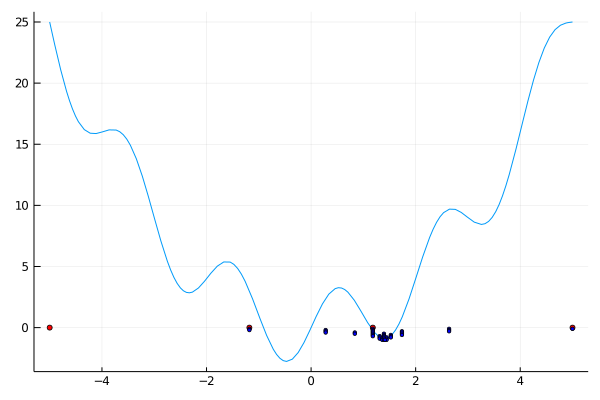

In [96]:
g(x) = x^2 + 3 * sin(π * x)
p = plot(g, -5, 5, leg=false)
golden_uni_plot(p, g, -5, 5)
p

In [133]:
f(x) = 1e-2 * ((x[1] - 1)^2 + 4 * (x[2] - 2)^2)
x = zeros(2)
d = -ForwardDiff.gradient(f, x)
ϕ(α) = f(x + α * d)

ϕ (generic function with 1 method)

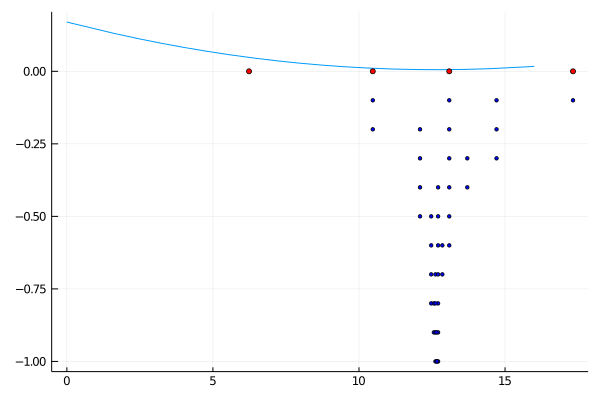

In [134]:
ϕs(α) = ϕ(α)
p = plot(ϕs, 0, 16, leg=false)
golden_uni_plot(p, ϕ, 0, 1)
p

In [141]:
using LinearAlgebra

function gradiente_BE(f, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    η = 1e-2
    num_backtrack = 0
    
    iter = 0
    while norm(∇f(x)) > 1e-4
        d = -∇f(x)
        ϕ(α) = f(x + α * d)
        # Busca Exata
        α = golden(ϕ, 0, 1)
        x = x + α * d
        iter += 1
        if iter > 1000
            error("Nao converge")
        end
    end
    
    return x, iter, num_backtrack
end

function gradiente_BE_plot(p, f, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    η = 1e-2
    num_backtrack = 0
    
    iter = 0
    scatter!(p, [x[1]], [x[2]], c=:red, ms=3)
    while norm(∇f(x)) > 1e-4
        d = -∇f(x)
        ϕ(α) = f(x + α * d)
        # Busca Exata
        α = golden(ϕ, 0, 1)
        xt = x + α * d
        plot!(p, [x[1], xt[1]], [x[2], xt[2]], c=:blue, l=:arrow)
        x = xt
        scatter!(p, [x[1]], [x[2]], c=:blue, ms=3)
        iter += 1
        if iter > 1000
            error("Nao converge")
        end
    end
    
    return x, iter, num_backtrack
end

gradiente_BE_plot (generic function with 1 method)

In [142]:
f(x) = (x[1] - 1)^2 + 4 * (x[2] - x[1]^2)^2
gradiente_BE(f, [-1.2; 1.0])

([0.9999018014919914, 0.9997922081950225], 77, 0)

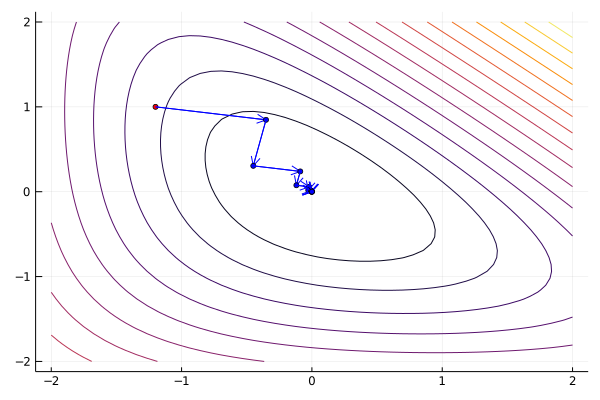

In [149]:
f(x) = log(exp(-x[1]) + exp(-x[2]) + exp(x[1] + x[2]))
xg = range(-2, 2, length=50)
yg = copy(xg)
p = contour(xg, yg, (x,y) -> f([x;y]), leg=false)
gradiente_BE_plot(p, f, [-1.2; 1.0])
# xlims!(0.99, 1.01)
# ylims!(0.99, 1.01)
p